In [23]:
import pandas as pd
%pylab inline
from matplotlib import rcParams
import seaborn as sns
from sklearn.datasets import load_boston
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.feature_selection import SelectKBest, chi2

Populating the interactive namespace from numpy and matplotlib


# DATASET DESCRIPTION

In [24]:
print (load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# A QUICK REGRESSION TUTORIAL FOR BENNINERS
**SOME OTHER THINGS YOU CAN DO LEARNING FROM THIS TUTORIAL**<br>
Embedding things in functions a good practice for real case scenario. ESPECIALLY RTO STOP REPETION<br>
Introducing a pipelines for each stage of the process.<br>
Using more ensemble of methods; algorithms such as XGBoost, LightBoost and Catboost are quite fast and efficient


In [25]:
boston_houses=load_boston()
boston=pd.DataFrame(data=boston_houses.data, columns=boston_houses.feature_names)
boston['MEDV']=boston_houses.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# QUICK EXPLORATION
Full exploration performed on perform is usually starts with having a great overview of the dataset features 
(by calling the .info( ) method on the dataset) then having a description of the dataset you are about the work on.
However,the steps can be skipped by the using the **Pandas_Profiling** module that provides a much deeper description of dasets

In [4]:
ProfileReport(boston)

In [26]:
# first creating a function to plot create a column ploting function

def col_visualizer(x):
    """This function takes a variable a return 2 viz plots
    first kde distribution plot and second a histogram"""
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,3,1)
    plt.hist(x, data=boston)
    
    plt.subplot(1,3,2)
    sns.distplot(boston[x])
    
    plt.subplot(1,3,3)
    plt.boxplot(x, data=boston)

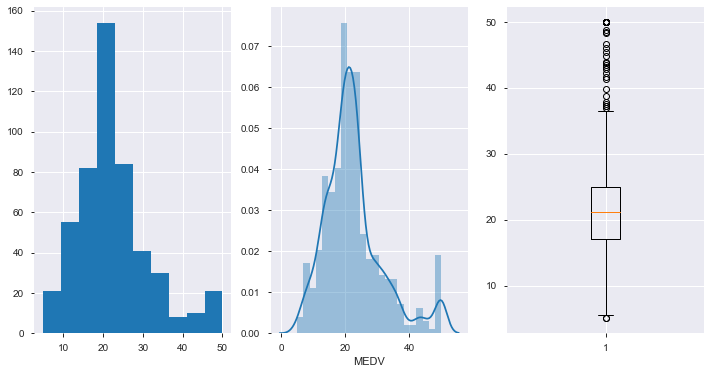

In [27]:
col_visualizer('MEDV')

**Quick Plots Analys** <br>
The distributiion plots above tell us more about the **MEDV** variable, especially the mast plot (boxplot). This boxplot shows us quite a lot of outliers after the boxplot max value that seems to be somewhere after 35K. That much outlier could easly squew the model.

In [28]:
def outlierDetector(x):
    
    upper=np.percentile(boston[x],75)
    lower=np.percentile(boston[x],25)
    
    inter=upper-lower
    
    box_floor=lower-1.5*inter
    box_ceiling=upper+1.5*inter
    
    return box_floor,box_ceiling

In [29]:
floor,ceiling=outlierDetector('MEDV')
floor,ceiling

(5.0624999999999964, 36.962500000000006)

In [30]:
X,y=boston.drop(columns='MEDV'),boston['MEDV']

In [31]:
type(X)

pandas.core.frame.DataFrame

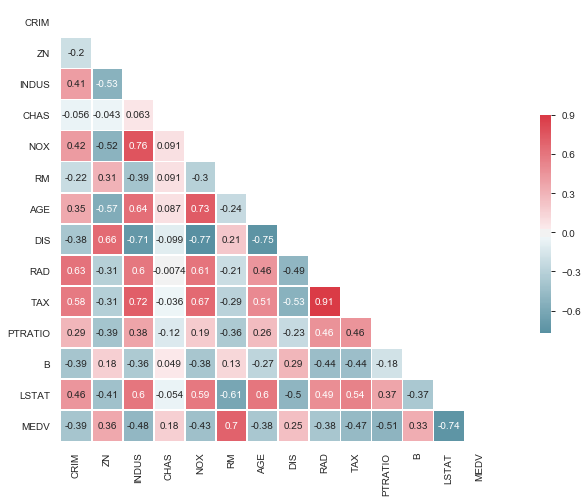

In [11]:

mask = np.zeros_like(boston.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(16,8))
sns.heatmap(boston.corr(), mask=mask, cmap=cmap, vmax=.9, center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True);

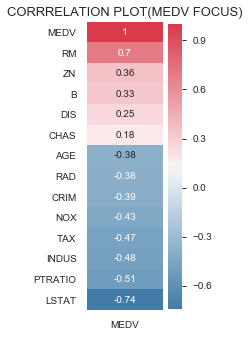

In [12]:
plt.figure(figsize=(1.7,5.3))
plt.title('CORRRELATION PLOT(MEDV FOCUS)', fontsize=13)
sns.heatmap(pd.DataFrame(boston.corr()['MEDV']).sort_values(
    by='MEDV', ascending=False), annot=True, cmap=sns.diverging_palette(240, 9, as_cmap=True));

<Figure size 864x576 with 0 Axes>

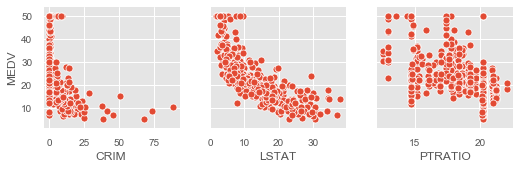

In [13]:
plt.style.use('ggplot');
plt.figure(figsize=(12,8));
sns.pairplot(x_vars=['CRIM', 'LSTAT', 'PTRATIO'] , y_vars='MEDV', data=boston);

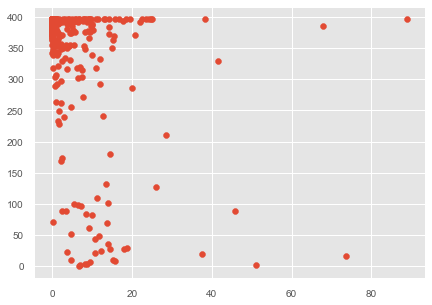

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(x='CRIM',y='B', data=boston, s=35);

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

The dummy regressor from sklearn it always a very good way to evaluate a real regression model. In other terms, it is a regressor that makes predictions using simple rules and that should nt used for real world problems.

In [16]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred= lin_model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score,mean_squared_error
rSq=r2_score(y_test,pred)
rmse=np.sqrt(mean_squared_error(y_test,pred))

In [18]:
print ('The R-squared for this model {}'.format(rSq))
print ('The Root mean square error for this model {}'.format(rmse))

The R-squared for this model 0.7261570836552478
The Root mean square error for this model 4.55236459846306


**ANALYSIS<br>**
With a R-Squared of just over 72.5%. This model could not be considered good enough. They are few ways to improve linear regressions . Two of the most famous one are:<br> 
1- Selected the right variables using **SelectBest** for example<br>
2- Using regularisation techniques (L1(**Lasso**), L2(**Ridge**), **ElasticNet**)<br>

Most of the time (depending on the variables number of variables you choose) Selected  the best varibales would be slightly better than using the Regularization although some Regularisation techniques such as Lasso would automatically drop the less impactful variables but you will still have to find the best parameters for the model. In this Notebook we will do both.

# SELECT BEST VARIABLES

In [19]:
select = SelectKBest(k=13)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

In [20]:
lin_model.fit(X_train_selected,y_train)
new_pred=lin_model.predict(X_test_selected)
r2=r2_score(y_test,new_pred)
root_s=np.sqrt(mean_squared_error(y_test,new_pred))
print (r2)
print (root_s)

0.7261570836552478
4.55236459846306


# LASSO, RIDGE , ELASTICNET

In [21]:
classifiers=[Lasso(max_iter=700,random_state=42),
             Ridge(max_iter=700,random_state=42), 
             ElasticNet(max_iter=700,random_state=42)]
rsqd=[]
rmses=[]
for clf in range(len(classifiers)):
    # First declare the variable parameters
    if clf==0:
        parameters={'alpha':[0.0005,0.0006,0.06,0.5,0.0001,0.01,1,2,3,4,4.4,4]}

    elif clf==1:
         parameters = {'alpha':[1,2,3,5,10,11,2,13,14,15]}

    else:
        parameters ={'alpha':[0.06,0.5,0.0001,0.01,1,2,3,4,4.4,4,5]}

    # Use clf as index to get the classifier
    current_clf = classifiers[clf]
    grid=GridSearchCV(current_clf, parameters,cv=5)

    # This is the correct classifier name, previously it returned int
    name = current_clf.__class__.__name__
    
    print("="*35)
    print(name)

    # Moved the below code inside the for loop
    grid.fit(X_train,y_train)
    pred=grid.predict(X_test)

    Rs = r2_score(y_test, pred)
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    rsqd.append(Rs)
    rmses.append(rmse)

    print('The R-squared is {:.4}'.format(Rs))
    print('The root mean squared is {:.4}'.format(rmse))
    


Lasso
The R-squared is 0.7261
The root mean squared is 4.553
Ridge
The R-squared is 0.7204
The root mean squared is 4.6
ElasticNet
The R-squared is 0.7261
The root mean squared is 4.553


In [22]:
pd.DataFrame(index=X.columns, data=lin_model.coef_, columns=['Coefficients']).sort_index(by='Coefficients'
                                                                                         , ascending=False)

,Coefficients
RM,3.902051
CHAS,3.238668
RAD,0.234854
INDUS,0.058211
ZN,0.037823
B,0.011770
TAX,-0.008213
AGE,-0.012851
CRIM,-0.128750
LSTAT,-0.547566


In [23]:
rsqd.insert(0,r2)
rmses.insert(0,root_s)

**POST ANALYSIS<br>**
The results of the regularization techniques are very similar to ones obatined selectING the best variables.  None of them can be considered as good. None of the models **explain more than 75% of variance**. There is no much  linear relationship between the dependent variable (**MEDV**) and independent ones.<br> Let's use an non-linear regression algorithm.


**Checking Results stablishing baselines.**<br>
Establishing baselines are good way of the checking how your model is performing. In this exercise. I will use 2 baselines models.<br> <br>
1- Random Regressor which conists in building a similar to the outcome vector but filled with random values, and evaluate the predictions of that vector.<br>
2- Dummy Regressor from sklearn. Which is a regressor that makes predictions with simple rules.It is mainly used for comparison purposes and cannot be apply to real world problems

# BASELINES 
**Random Regressor**

In [24]:
#building the random regressor 
y_pred_rand=np.random.randint(np.min(y_train),np.max(y_train), y_test.shape)

# evaluation of the random regressor
print (np.sqrt(mean_squared_error(y_test,y_pred_rand)))

15.222955798186268


**Dummy Regressor**

In [25]:
from sklearn.dummy import DummyRegressor
dum=DummyRegressor(strategy='mean')
dum.fit(X_train, y_train)

y_dum_pred=dum.predict(X_test)

print (np.sqrt(mean_squared_error(y_test,y_dum_pred)))
print (r2_score)

8.799980682431661
<function r2_score at 0x1a16a74b70>


# KN-REGRESSION

In [26]:
from sklearn.neighbors import KNeighborsRegressor

r_sqrd=[]
r_mcs=[]
for i in range(1,31):
    knn_reg=KNeighborsRegressor(n_neighbors=i)
    knn_reg.fit(X_train, y_train)
    knn_pred=knn_reg.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,knn_pred))
    score=r2_score(y_test,knn_pred)
    r_mcs.append(rmse)
    r_sqrd.append(score)

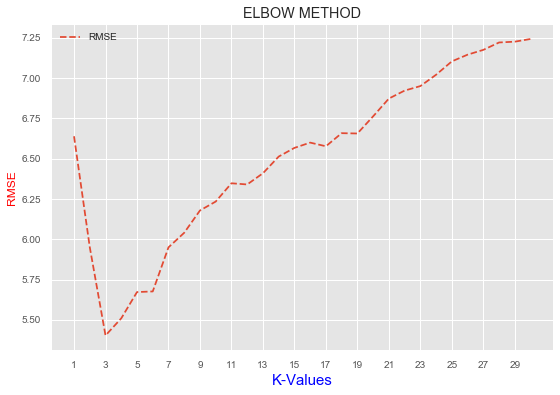

In [27]:
# Implementing the elbow method to determine the corrrect number of K
plt.figure(figsize=(9,6))
plt.title('ELBOW METHOD')
plt.plot(range(1,31), r_mcs, linestyle='--', label='RMSE')
plt.xlabel('K-Values',fontsize=15,color='blue')
plt.ylabel('RMSE',color='red')
plt.legend()
plt.xticks(range(1,30,2));

In [28]:
print('The Root-mean-squared for the knn is: %3f '% min(r_mcs))
print('The R-Squared for the knn is %3f '% max(r_sqrd))
print ('The Nearest Neighbor does not seem  to be a good model for this data')

The Root-mean-squared for the knn is: 5.403005 
The R-Squared for the knn is 0.614257 
The Nearest Neighbor does not seem  to be a good model for this data


In [29]:
rsqd.append(max(r_sqrd))
rmses.append(min(r_mcs))

# USING TREES

Using a techique that is very similar to an elbow method to its very essential when using an ensemble of method as the<br>
The accuracy could drastically change according to the random State you are choosing.

In [31]:
from sklearn.ensemble import RandomForestRegressor
r=[]
p=[]
for i in range(1,80):
    rand=RandomForestRegressor(random_state=i)
    rand.fit(X_train, y_train)
    rand_pred=rand.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,rand_pred))
    score=r2_score(y_test,rand_pred)
    r.append(rmse)
    p.append(score)

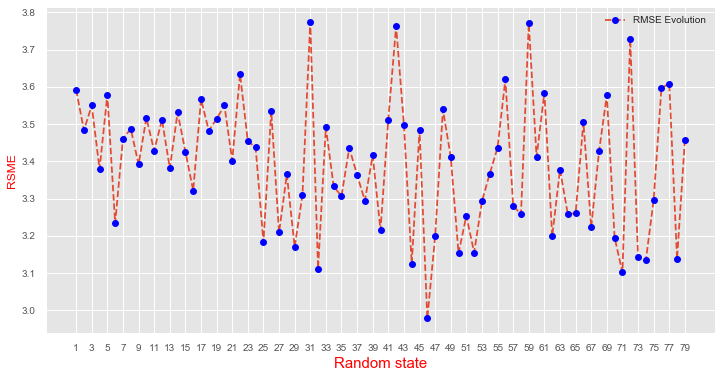

In [32]:
plt.figure(figsize=(12,6))
plt.plot(range(1,80), r, linestyle='--', label='RMSE Evolution', marker='o', markerfacecolor='blue')
plt.xlabel('Random state',fontsize=15,color='red')
plt.ylabel('RSME',color='red')
plt.legend()
plt.xticks(range(1,80,2));

In [33]:

rfr=RandomForestRegressor(random_state=46)

rfr.fit(X_train_selected,y_train)
rfr_pred=rfr.predict(X_test_selected)
R_squared=r2_score(y_test,rfr_pred)
rmse=np.sqrt(mean_squared_error(y_test,pred))

print('The R-squared is {:.4}'.format(R_squared))
print('The root mean squared is {:.4}'.format(rmse))

The R-squared is 0.8828
The root mean squared is 4.553


**Randomized Search**

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in the Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [35]:

rf_random = RandomizedSearchCV(rfr, param_distributions = random_grid, n_iter = 100, 
                               cv = 5, random_state=46, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=4...


In [36]:
rf_pred=rf_random.predict(X_test_selected)
r2_rf=r2_score(y_test,rf_pred)
rm_rf=np.sqrt(mean_squared_error(y_test,rf_pred))

print ('R-squared',r2_rf)
print ('Root-mean-squared', rm_rf)


R-squared 0.8747250728009451
Root-mean-squared 3.0790614847539293


In [37]:
s=pd.DataFrame(index=X.columns,data=rfr.feature_importances_,columns=['Importance']).sort_values(
    by='Importance', ascending=False)
s

,Importance
RM,0.459516
LSTAT,0.362874
DIS,0.062842
CRIM,0.028072
PTRATIO,0.016327
TAX,0.015423
AGE,0.013793
NOX,0.012826
B,0.010811
INDUS,0.010749


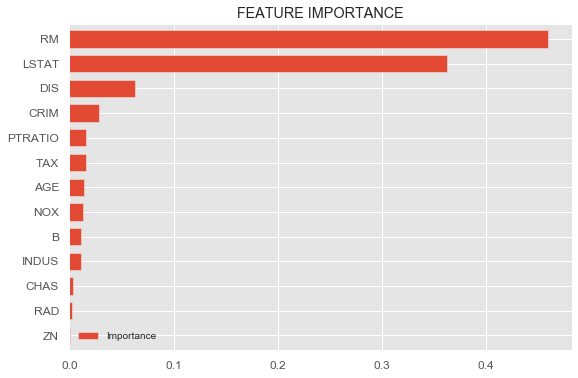

In [38]:
s.sort_values(by='Importance',ascending=True).plot(kind='barh', figsize=(9,6), width=.7,
                                                  title='FEATURE IMPORTANCE', fontsize=12);

In [39]:
# Comparing the first 5 premieres predictions 
best_comp=pd.DataFrame([y_test], index=['MEDV']).T
best_comp['PREDS']=rf_pred
best_comp.head()

,MEDV,PREDS
173,23.6,23.193292
274,32.4,31.716429
491,13.6,15.525396
72,22.8,23.854584
452,16.1,17.525675


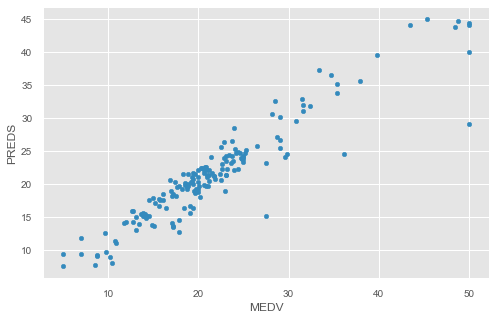

In [40]:
best_comp.plot.scatter(x='MEDV',y='PREDS', figsize=(8,5));

In [41]:
rmses.extend([rmse,rm_rf])
rsqd.extend([R_squared,r2_rf])

In [42]:
conclusion_df=pd.DataFrame([rmses,rsqd], columns=['LinReg','Lasso','Ridge','ElastiNet','KNReg','RandFoReg',
                                                 'RanFoRegG'], index=['rmse', 'r_squared']).T

In [43]:
conclusion_df['r_squared']=conclusion_df['r_squared']*100
conclusion_df

,rmse,r_squared
LinReg,4.552365,72.615708
Lasso,4.552854,72.609822
Ridge,4.599927,72.040500
ElastiNet,4.553246,72.605100
KNReg,5.403005,61.425682
RandFoReg,4.553246,88.280885
RanFoRegG,3.079061,87.472507


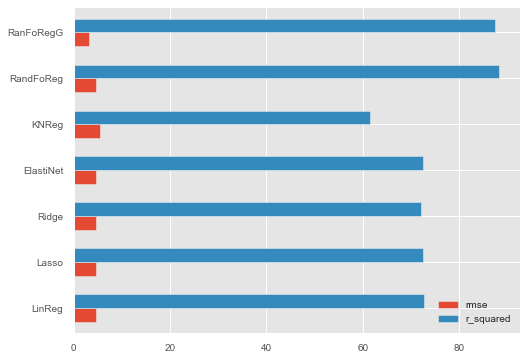

In [44]:
conclusion_df.plot(kind='barh', figsize=(8,6), width=0.6);

# Now let's get Serious (Boxcox)

Knowing how to apply models sometimes does not suffice to be a good data scientist. Knowing the backend of the model helps so much as the exploration of the dataset would most likely give you ideas of how to transform your features. Theorically, if my response variable is normally distributed, I should have better results. In the cells above I plotted the distribution of the <b>MEDV</b> variable and it looked okay but not normally distributed.
So what I would do next is:<br>
- Check the distribution of the <b>MEDV<b> to confirm the normality
- Transform the <b>MEDV<b>
    
Here are some transformations you can use to make your data normal:<br>
- square, cubic, logarithm transformations
- Yeo-johnson & Boxcox transformations (These ones are the best)<br>


Remember, in order to carry out your Boxcox Transformations your variables should not contains zero and negative values.



In [36]:
from scipy.stats import normaltest,boxcox
normaltest(boston['MEDV'])

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

The p-value obtained after the test is lower 0.05 showing that my response variable is not normally distributed. Let's transform it using the Boxcox Transformation and do the test again.

In [37]:
yt, _ =boxcox(boston['MEDV'])

In [38]:
normaltest(yt)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

**GOOD**
Now we redo the split t with the same random seed and redo the multiple regression

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, yt, test_size = 0.33, random_state=42)

In [33]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
pred= lin_model.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
rSq=r2_score(y_test,pred)
rmse=np.sqrt(mean_squared_error(y_test,pred))

In [35]:
print ('The R-squared for this model {}'.format(rSq))
print ('The Root mean square error for this model {}'.format(rmse))

The R-squared for this model 0.7716524343327433
The Root mean square error for this model 0.36269044007667195


As you can see now. We have a drastic improvement of the R-squared and but also the Rmse. :)